In [1]:
#import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imageio
import numpy.matlib
import os
from scipy.io import loadmat
import networkx as nx
from scipy.spatial.distance import cdist

In [2]:
os.getcwd()


'C:\\Users\\la-ma'

In [3]:
os.chdir('data')

In [4]:
images = loadmat('isomap.mat')['images']

In [5]:
images.shape

(4096, 698)

In [8]:
# get a starting epsilon
epsilon = np.linalg.norm(images[:,0]-images[:,520])

In [6]:
epsilon = 23

### Euclidean Distance

In [7]:
distance = cdist(images.T,images.T, 'euclidean')

In [8]:
distance.shape

(698, 698)

In [9]:
distance

array([[ 0.        , 18.83094952,  6.74323967, ..., 21.51126745,
        22.79289298, 18.03618033],
       [18.83094952,  0.        , 19.55307161, ..., 15.07435566,
        21.63387369, 20.97399746],
       [ 6.74323967, 19.55307161,  0.        , ..., 22.82140093,
        23.24040786, 18.68417978],
       ...,
       [21.51126745, 15.07435566, 22.82140093, ...,  0.        ,
        23.3365749 , 17.19515048],
       [22.79289298, 21.63387369, 23.24040786, ..., 23.3365749 ,
         0.        , 20.31353772],
       [18.03618033, 20.97399746, 18.68417978, ..., 17.19515048,
        20.31353772,  0.        ]])

In [16]:
# check if node has at least 100 neighbors, search for epsilon leading to at least 100 neighbors

epsilon = 22.4
A = np.where(distance<epsilon,0,distance) # Adjacency matrix reverse
neighbors = np.min((len(distance)) - (np.count_nonzero(A > 0, axis=1)))

In [10]:
Adjacency_matrix = np.where(distance<=epsilon,distance,0) # real adjacency matrix

In [11]:
Adjacency_matrix

array([[ 0.        , 18.83094952,  6.74323967, ..., 21.51126745,
        22.79289298, 18.03618033],
       [18.83094952,  0.        , 19.55307161, ..., 15.07435566,
        21.63387369, 20.97399746],
       [ 6.74323967, 19.55307161,  0.        , ..., 22.82140093,
         0.        , 18.68417978],
       ...,
       [21.51126745, 15.07435566, 22.82140093, ...,  0.        ,
         0.        , 17.19515048],
       [22.79289298, 21.63387369,  0.        , ...,  0.        ,
         0.        , 20.31353772],
       [18.03618033, 20.97399746, 18.68417978, ..., 17.19515048,
        20.31353772,  0.        ]])

In [17]:
neighbors

101

In [12]:
Adjacency_matrix.shape

(698, 698)

In [15]:
# step 1: construct the neigbhorhood graph by using euclidean distance --> shortest path
from sklearn.utils.graph_shortest_path import graph_shortest_path
D = graph_shortest_path(Adjacency_matrix) # get shortest path --> Distance Matrix D


In [16]:
D

array([[ 0.        , 18.83094952,  6.74323967, ..., 21.51126745,
        22.79289298, 18.03618033],
       [18.83094952,  0.        , 19.55307161, ..., 15.07435566,
        21.63387369, 20.97399746],
       [ 6.74323967, 19.55307161,  0.        , ..., 22.82140093,
        26.95043353, 18.68417978],
       ...,
       [21.51126745, 15.07435566, 22.82140093, ...,  0.        ,
        27.23986595, 17.19515048],
       [22.79289298, 21.63387369, 26.95043353, ..., 27.23986595,
         0.        , 20.31353772],
       [18.03618033, 20.97399746, 18.68417978, ..., 17.19515048,
        20.31353772,  0.        ]])

In [123]:
D.shape

(698, 698)

In [ ]:
# Implement  the  ISOMAP  algorithm  yourself  to  obtain  a k=  2-dimensional  embedding.
# This  means,  each  picture  is  represented  by  a  two-dimensional  vector  
#(Z in  the  lecture),  which  wecalled  “embedding”  of  pictures.  
#Plot  the  embeddings  using  a  scatter  plot,  similar  to  the  plots  
#inlecture  slides.   Find  a  few  images  in  the  embedding  space  and  show  
#what  these  images  look  like. Comment on do you see any visual similarity among them 
#and their arrangement, similar to what youseen in the paper?

In [27]:
# get the isomap
from scipy import linalg
def isomap (D, dim):
    n,m = D.shape
    D = D**2
    b = np.eye(m) - (1/m)*np.ones((m, m)) # Preprocessing to get the right shape
    
    h = (-1/(2*m)) * b.dot(D).dot(b)
    
    values,vectors = linalg.eig(h) # get the eigenvalues
    
    idx = values.argsort()[::-1] # sort them descending
    
    values = values[idx]         # apply new order
    vectors = vectors[:,idx]     # apply new order
    
    values = values[:dim]
    vectors = vectors[:,:dim]
    
    Z = vectors.dot(np.diag(values**(-1/2)))
    Z = Z.real
    
    return Z
    



In [124]:
test = isomap(D, dim=2)

In [125]:
test

array([[ 0.00156325,  0.00148818],
       [-0.00169546,  0.00120135],
       [ 0.00248462,  0.00111403],
       ...,
       [-0.00630848,  0.00202655],
       [-0.00202871, -0.00823779],
       [-0.00373391, -0.00156616]])

In [126]:
test.shape

(698, 2)

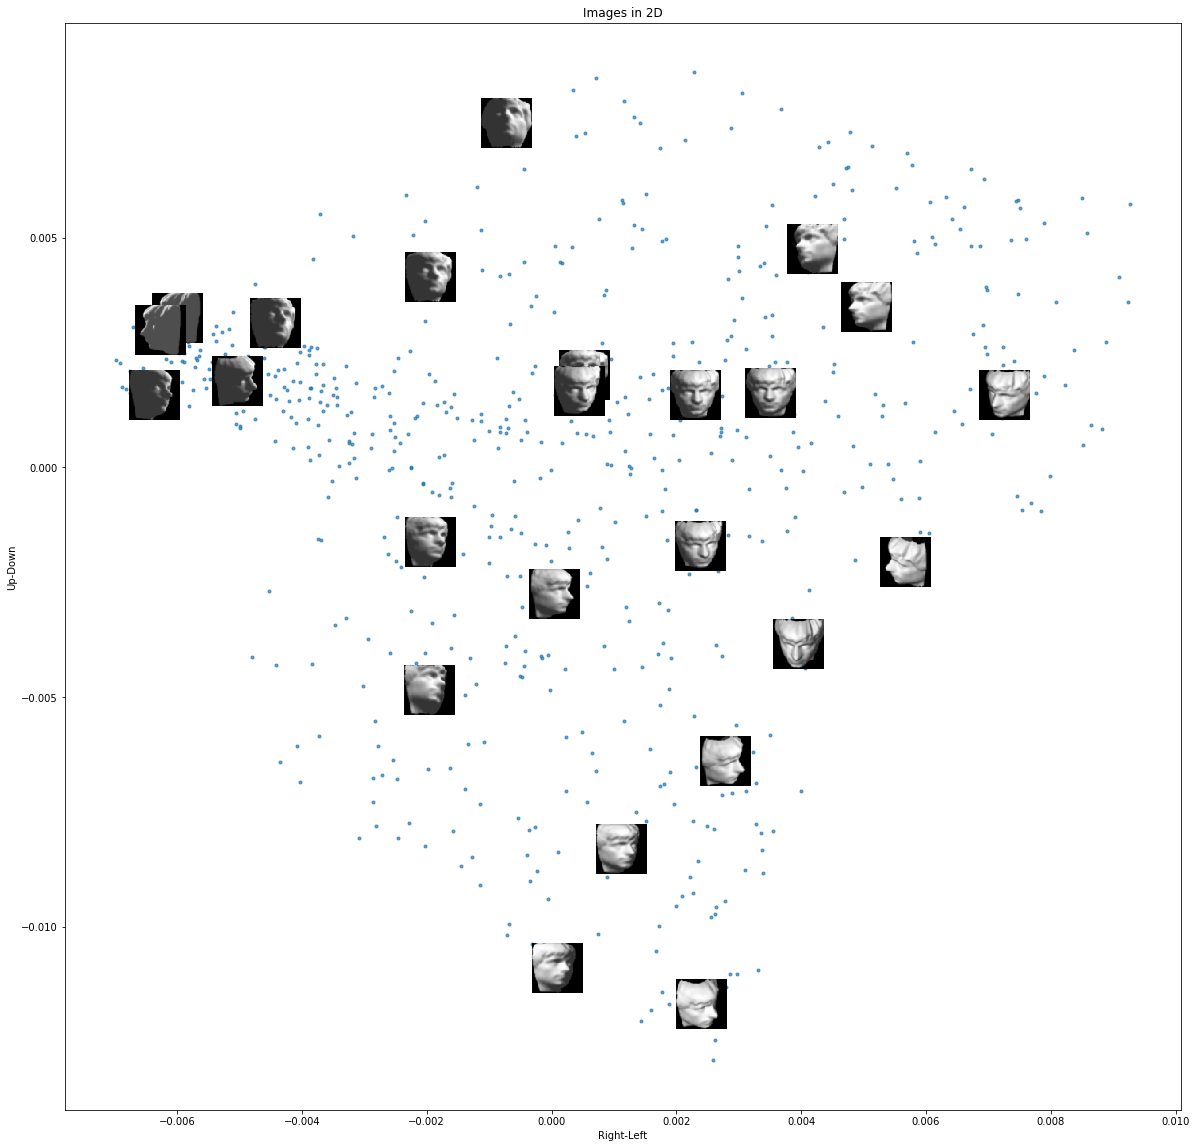

In [127]:
fig = plt.figure()
fig.set_size_inches(20, 20)
ax = fig.add_subplot(111)
ax.set_title('Images in 2D')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')

# Show images
x_size = (max(test[:,0]) - min(test[:,0])) * 0.05
y_size = (max(test[:,1]) - min(test[:,1])) * 0.05

for i in range(25):
    img = np.random.randint(0, 698)
    x0 = test[img, 0] - (x_size / 2.)
    y0 = test[img, 1] - (y_size / 2.)
    
    x1 = test[img, 0] + (x_size / 2.)
    y1 = test[img, 1] + (y_size / 2.)
    
    
    images_show = images[:, img].reshape(64,64).T
    
    ax.imshow(images_show, aspect='auto', cmap=plt.cm.gray, interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))

# Show scatterplot
ax.scatter(test[:,0], test[:,1], marker='.',alpha=0.7)

ax.set_ylabel('Up-Down')
ax.set_xlabel('Right-Left')

plt.show()

### Manhattan Distance

In [54]:
# In Germany we say "the same in green" with Manhattan Distance instead of Euclidean
distance_manhattan = cdist(images.T,images.T, 'cityblock')

In [55]:
distance_manhattan.shape

(698, 698)

In [56]:
distance_manhattan


array([[   0.        ,  965.31026348,  257.36994485, ..., 1073.33045343,
        1083.13501838,  801.11789216],
       [ 965.31026348,    0.        ,  998.80539216, ...,  591.33363971,
        1041.83131127, 1054.478125  ],
       [ 257.36994485,  998.80539216,    0.        , ..., 1152.43014706,
        1123.03106618,  854.53792892],
       ...,
       [1073.33045343,  591.33363971, 1152.43014706, ...,    0.        ,
        1070.02515319,  736.96179534],
       [1083.13501838, 1041.83131127, 1123.03106618, ..., 1070.02515319,
           0.        ,  906.32530637],
       [ 801.11789216, 1054.478125  ,  854.53792892, ...,  736.96179534,
         906.32530637,    0.        ]])

In [94]:
# check if node has at least 100 neighbors, search for epsilon leading to at least 100 neighbors

epsilon_manhattan = 1009
A_manhattan = np.where(distance_manhattan<epsilon_manhattan,0,distance_manhattan) # Adjacency matrix reverse
neighbors_manhattan = np.min((len(distance_manhattan)) - (np.count_nonzero(A_manhattan > 0, axis=1)))

In [95]:
neighbors_manhattan

100

In [98]:
Adjacency_matrix_manhattan = np.where(distance_manhattan<=epsilon_manhattan,distance_manhattan,0) # real adjacency matrix

In [99]:
Adjacency_matrix_manhattan

array([[  0.        , 965.31026348, 257.36994485, ...,   0.        ,
          0.        , 801.11789216],
       [965.31026348,   0.        , 998.80539216, ..., 591.33363971,
          0.        ,   0.        ],
       [257.36994485, 998.80539216,   0.        , ...,   0.        ,
          0.        , 854.53792892],
       ...,
       [  0.        , 591.33363971,   0.        , ...,   0.        ,
          0.        , 736.96179534],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 906.32530637],
       [801.11789216,   0.        , 854.53792892, ..., 736.96179534,
        906.32530637,   0.        ]])

In [100]:
Adjacency_matrix_manhattan.shape

(698, 698)

In [101]:
D_manhattan = graph_shortest_path(Adjacency_matrix_manhattan) # get shortest path --> Distance Matrix D


In [102]:
test_manhattan = isomap(D_manhattan, dim=2)

In [113]:
test_manhattan.shape

(698, 2)

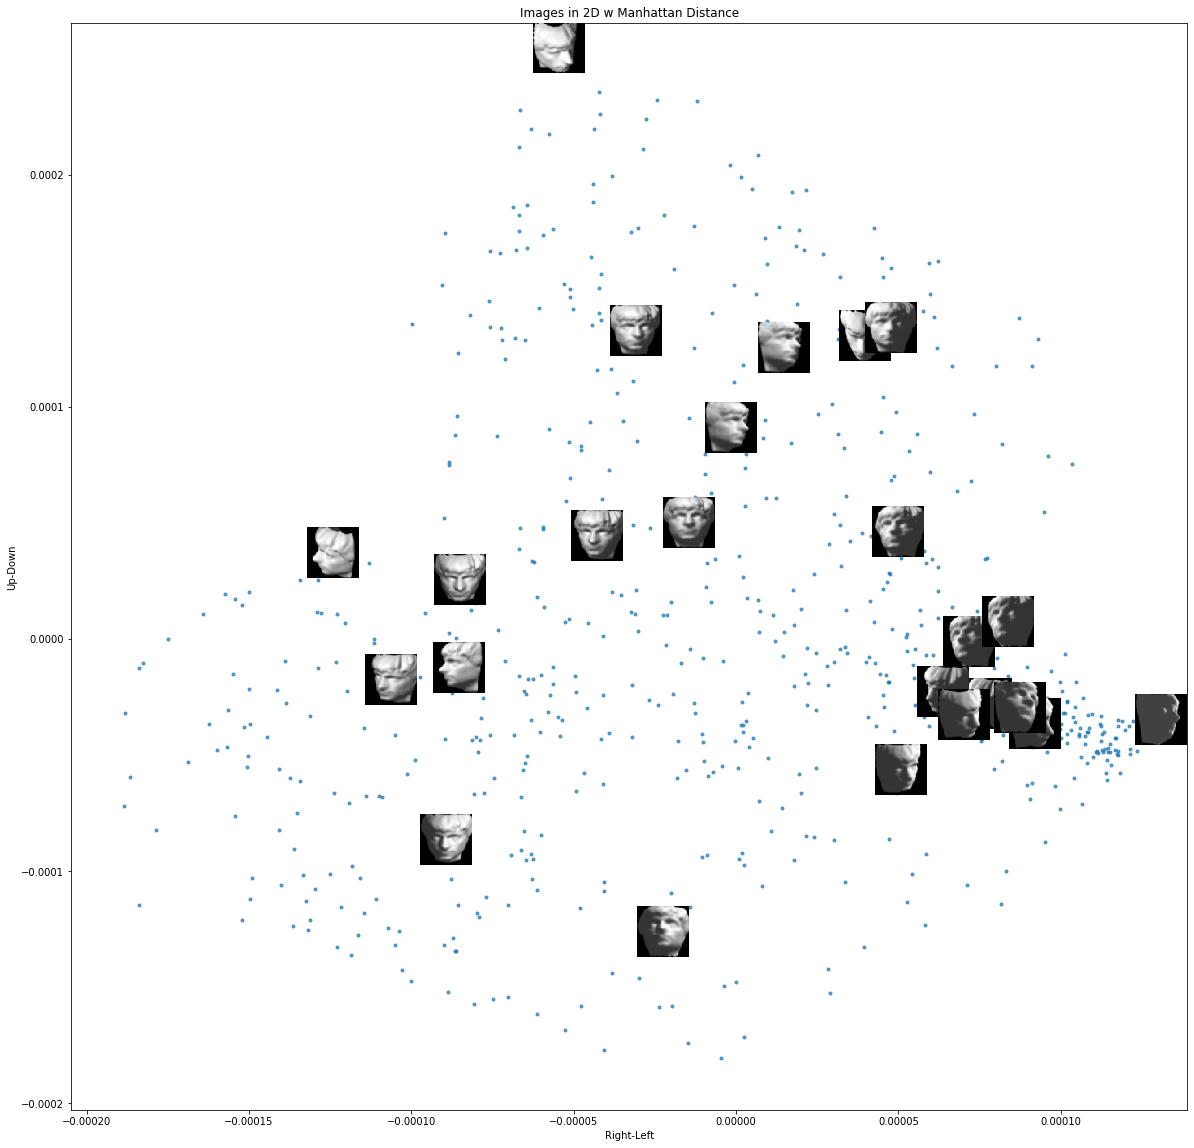

In [107]:
fig = plt.figure()
fig.set_size_inches(20, 20)
ax = fig.add_subplot(111)
ax.set_title('Images in 2D w Manhattan Distance')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')

# Show images
x_size = (max(test_manhattan[:,0]) - min(test_manhattan[:,0])) * 0.05
y_size = (max(test_manhattan[:,1]) - min(test_manhattan[:,1])) * 0.05

for i in range(25):
    img = np.random.randint(0, 698)
    x0 = test_manhattan[img, 0] - (x_size / 2.)
    y0 = test_manhattan[img, 1] - (y_size / 2.)
    
    x1 = test_manhattan[img, 0] + (x_size / 2.)
    y1 = test_manhattan[img, 1] + (y_size / 2.)
    
    
    images_show = images[:, img].reshape(64,64).T
    
    ax.imshow(images_show, aspect='auto', cmap=plt.cm.gray, interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))

# Show scatterplot
ax.scatter(test_manhattan[:,0], test_manhattan[:,1], marker='.',alpha=0.7)

ax.set_ylabel('Up-Down')
ax.set_xlabel('Right-Left')

plt.show()

### PCA

In [108]:
# now perform PCA instead of isomap
from sklearn.preprocessing import StandardScaler
images_data_PCA = StandardScaler().fit_transform(images.T)
images_data_PCA

array([[-0.09994111, -0.12295809, -0.15587808, ...,  0.        ,
         0.        ,  0.        ],
       [-0.09994111, -0.12295809, -0.15587808, ...,  0.        ,
         0.        ,  0.        ],
       [-0.09994111, -0.12295809, -0.15587808, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.09994111, -0.12295809, -0.15587808, ...,  0.        ,
         0.        ,  0.        ],
       [-0.09994111, -0.12295809, -0.15587808, ...,  0.        ,
         0.        ,  0.        ],
       [-0.09994111, -0.12295809, -0.15587808, ...,  0.        ,
         0.        ,  0.        ]])

In [110]:
cov_images_data = np.cov(images_data_PCA)

In [111]:
values_PCA, vectors_PCA = np.linalg.eig(cov_images_data)
idx_sorted = np.argsort(values_PCA)[::-1]
values_PCA = values_PCA[idx_sorted]
vectors_PCA = vectors_PCA[idx_sorted]

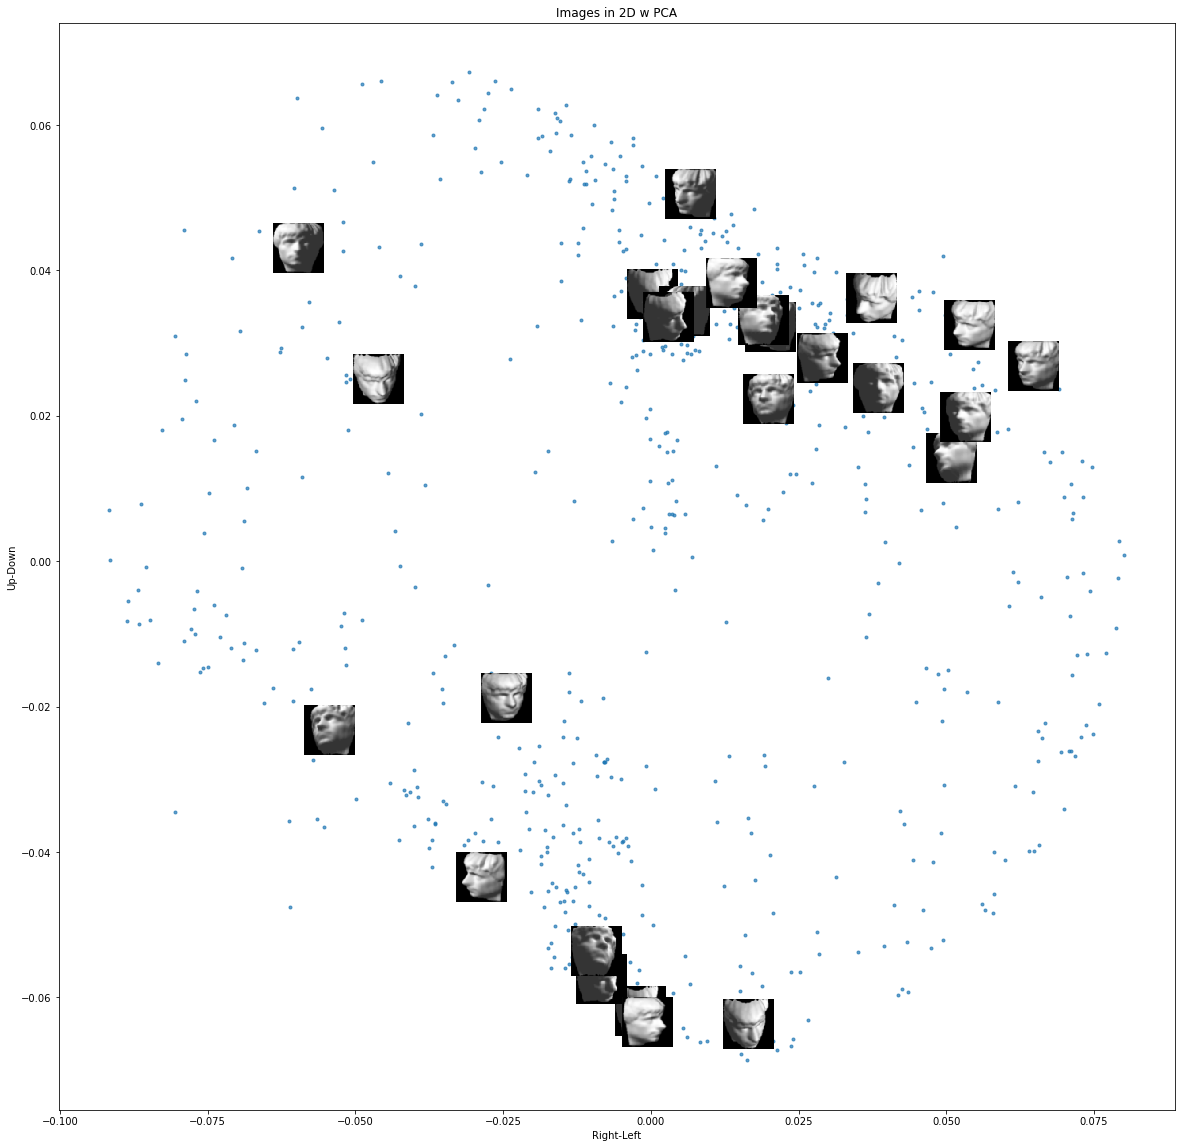

In [122]:
fig = plt.figure()
fig.set_size_inches(20, 20)
ax = fig.add_subplot(111)
ax.set_title('Images in 2D w PCA')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')

# Show images
x_size = (max(vectors_PCA[:,0]) - min(vectors_PCA[:,0])) * 0.05
y_size = (max(vectors_PCA[:,1]) - min(vectors_PCA[:,1])) * 0.05

for i in range(25):
    img = np.random.randint(0, 698)
    x0 = vectors_PCA[img, 0] - (x_size / 2.)
    y0 = vectors_PCA[img, 1] - (y_size / 2.)
    
    x1 = vectors_PCA[img, 0] + (x_size / 2.)
    y1 = vectors_PCA[img, 1] + (y_size / 2.)
    
    
    images_show = images[:, img].reshape(64,64).T
    
    ax.imshow(images_show, aspect='auto', cmap=plt.cm.gray, interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))

# Show scatterplot
ax.scatter(vectors_PCA[:,0], vectors_PCA[:,1], marker='.',alpha=0.7)

ax.set_ylabel('Up-Down')
ax.set_xlabel('Right-Left')

plt.show()